# Exploratory Data Analysis (EDA) 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('customer_data.csv')

In [2]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15798024,537,Germany,Male,84,8,92242.34,1,1,1,186235.98,0
1,15806913,670,France,Female,54,2,95507.12,1,1,1,63213.31,0
2,15664849,573,Spain,Male,46,3,65269.23,1,0,1,189988.65,1
3,15586752,628,Germany,Male,33,8,152143.89,1,1,1,32174.03,0
4,15755642,667,France,Male,34,5,0.00,2,1,1,102908.63,0


In [3]:
data.shape

(2000, 12)

In [4]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       2000 non-null   int64  
 1   credit_score      2000 non-null   int64  
 2   country           2000 non-null   object 
 3   gender            2000 non-null   object 
 4   age               2000 non-null   int64  
 5   tenure            2000 non-null   int64  
 6   balance           2000 non-null   float64
 7   products_number   2000 non-null   int64  
 8   credit_card       2000 non-null   int64  
 9   active_member     2000 non-null   int64  
 10  estimated_salary  2000 non-null   float64
 11  churn             2000 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 187.6+ KB


In [6]:
# Checking for dupicates 
data.duplicated().sum()

0

In [7]:
# Checking for data imbalance
data['churn'].value_counts()

0    1577
1     423
Name: churn, dtype: int64

In [8]:
# Removing 'customer_id' 
data = data.drop('customer_id', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      2000 non-null   int64  
 1   country           2000 non-null   object 
 2   gender            2000 non-null   object 
 3   age               2000 non-null   int64  
 4   tenure            2000 non-null   int64  
 5   balance           2000 non-null   float64
 6   products_number   2000 non-null   int64  
 7   credit_card       2000 non-null   int64  
 8   active_member     2000 non-null   int64  
 9   estimated_salary  2000 non-null   float64
 10  churn             2000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 172.0+ KB


Text(0.5, 1.0, 'Correlation Heatmap')

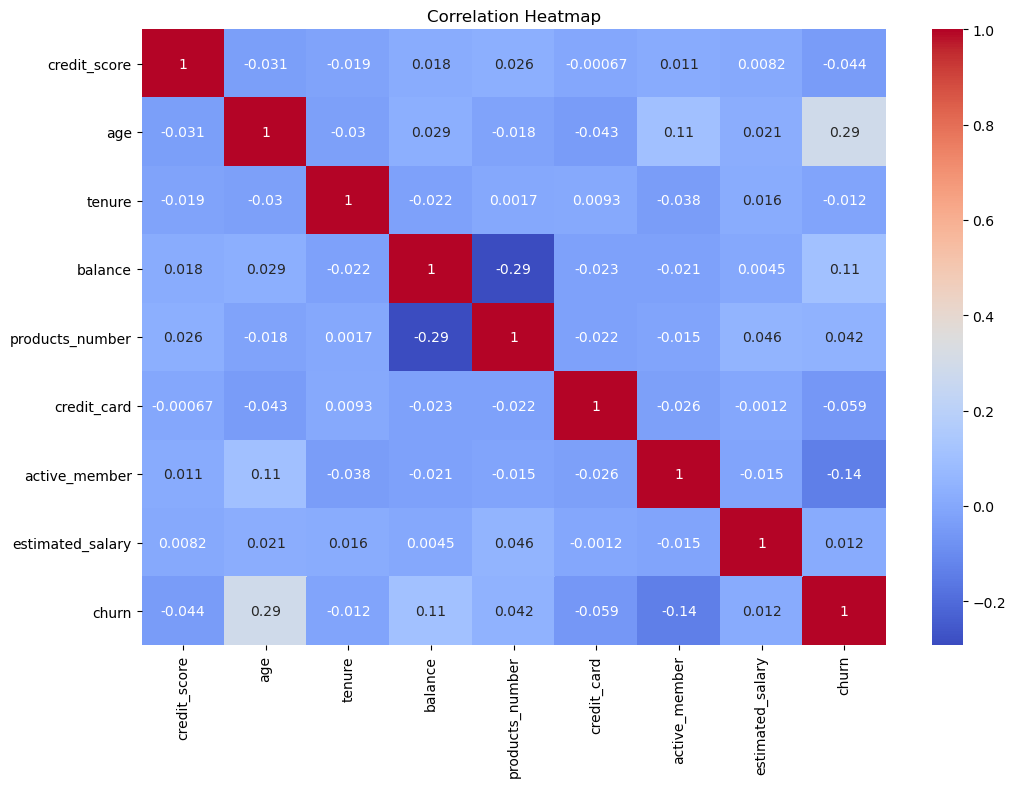

In [9]:
# Explore correlation between features
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Data Preprocessing

In [10]:
# Encode 'gender' and 'country' columns
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['country'], drop_first=True)

In [11]:
# Separate features and target variable
X = data.drop('churn', axis=1)
y = data['churn']

In [12]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the class distribution in the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [14]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling to the training and testing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()

# Train models
logreg_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)

# Predictions
logreg_preds = logreg_model.predict(X_test_scaled)
rf_preds = rf_model.predict(X_test_scaled)
gb_preds = gb_model.predict(X_test_scaled)
svm_preds = svm_model.predict(X_test_scaled)
knn_preds = knn_model.predict(X_test_scaled)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=['Not Churn', 'Churn'])
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

evaluate_model(y_test, logreg_preds, "Logistic Regression")
evaluate_model(y_test, rf_preds, "Random Forest")
evaluate_model(y_test, gb_preds, "Gradient Boosting")
evaluate_model(y_test, svm_preds, "Support Vector Machine")
evaluate_model(y_test, knn_preds, "K-Nearest Neighbors")

Model: Logistic Regression
Accuracy: 0.7527733755942948
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.76      0.76      0.76       325
       Churn       0.74      0.75      0.75       306

    accuracy                           0.75       631
   macro avg       0.75      0.75      0.75       631
weighted avg       0.75      0.75      0.75       631

Model: Random Forest
Accuracy: 0.8304278922345484
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.84      0.83      0.83       325
       Churn       0.82      0.83      0.83       306

    accuracy                           0.83       631
   macro avg       0.83      0.83      0.83       631
weighted avg       0.83      0.83      0.83       631

Model: Gradient Boosting
Accuracy: 0.8161648177496038
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.82      0.82      0.82       325
     

# Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'Support Vector Machine': svm_model,
    'K-Nearest Neighbors': knn_model
}

# Perform cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
    print(f"Model: {model_name}")
    print("Cross-Validation Accuracy Scores:", scores)
    print("Mean Accuracy:", scores.mean())
    print("Standard Deviation:", scores.std())
    print("=" * 50)

Model: Logistic Regression
Cross-Validation Accuracy Scores: [0.659271   0.71156894 0.70839937 0.65768621 0.67460317]
Mean Accuracy: 0.6823057379317283
Standard Deviation: 0.023380599074952296
Model: Random Forest
Cross-Validation Accuracy Scores: [0.74009509 0.82725832 0.88272583 0.8748019  0.87936508]
Mean Accuracy: 0.8408492440822076
Standard Deviation: 0.054269723597785535
Model: Gradient Boosting
Cross-Validation Accuracy Scores: [0.74167987 0.8066561  0.82725832 0.83359746 0.84444444]
Mean Accuracy: 0.8107272407113928
Standard Deviation: 0.03665320361472023
Model: Support Vector Machine
Cross-Validation Accuracy Scores: [0.5451664  0.57210777 0.5800317  0.54199683 0.58412698]
Mean Accuracy: 0.5646859356526551
Standard Deviation: 0.017688063457768213
Model: K-Nearest Neighbors
Cross-Validation Accuracy Scores: [0.66719493 0.65610143 0.65768621 0.67511886 0.67460317]
Mean Accuracy: 0.6661409201821247
Standard Deviation: 0.00806966653582238
